In [1]:
from target import poet_target
import pickle

In [11]:
if True:
    # Perform new Gaia query
    
    # Results stored in pickle file as: prefix + t_id + '.pkl' (with ' ' -> '_')
    gs_criteria = {'Gmag':[-10., 12.], # Criteria used for selecting guide stars
                   'Umag':[-10., 10.], 
                   'Imag':[-10., 9.]}
    p1 = poet_target.Target(
                            prefix='', # Prefix used for filenames
                            t_id='HD 80606', # Target ID
                            ra=140.65696231986905,
#                             dec=88.,
                            dec=50.60377794926782,
                            srch_Gmax=12., # Max Gaia G magnitude for Gaia query
                            srch_nmax=5000, # Max number of Gaia sources to return
                            gs_criteria=gs_criteria, # Criteria used for selecting guide stars
                            fov_pa=0., # Position angle of CCD FoV
                            save=True,
                            )

    p1.search_gaia()
else:
    # Load saved results
    p1 = pickle.load(open('HD_80606.pkl','rb'))

53 Gaia source(s) found.


28 guide star(s) identified.


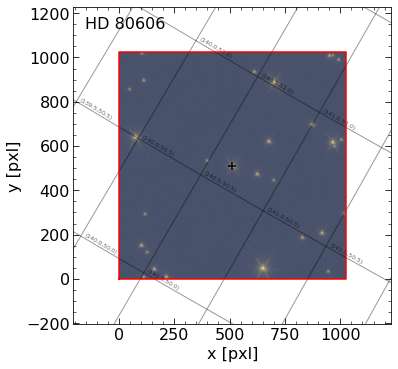

In [14]:
# Re-calculate CCD coordinates with rotated FoV
# Gaia query uses circular search region => FoV can be rotated without re-running query
p1.calc_gaia_xy(fov_pa=30)

# Calculate scene and save (needs to be re-calculated if FoV changes)
# p1.scene_sim() # Automatically saves if p1.save == True (default)

# Re-select guide stars using new criteria
gs_criteria = {'Gmag':[-10., 15.], 'Umag':[-10., 14.], 'Imag':[-10., 15.]}
p1.id_guide_stars(gs_criteria=gs_criteria)

# Generate plot
p1.plot_fov(save_plot=True,
                plot_guide_stars=False, # Highlights identified guide stars with red boxes; default: True
                plot_bkg_stars=False, # Plot Gaia sources as points (scaled by G magnitude); default: True
#                 plot_grid=False, # Plot grid lines; default: True
                add_scene_sim=True, # Default: False
            )